# Previsão de valores do aluguel de imóveis no município de São Paulo

In [68]:
import pandas as pd

In [69]:
df_imoveis = pd.read_csv('./dados/data.csv')
df_imoveis

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


## Análise dos dados

In [70]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [71]:
df_imoveis.describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


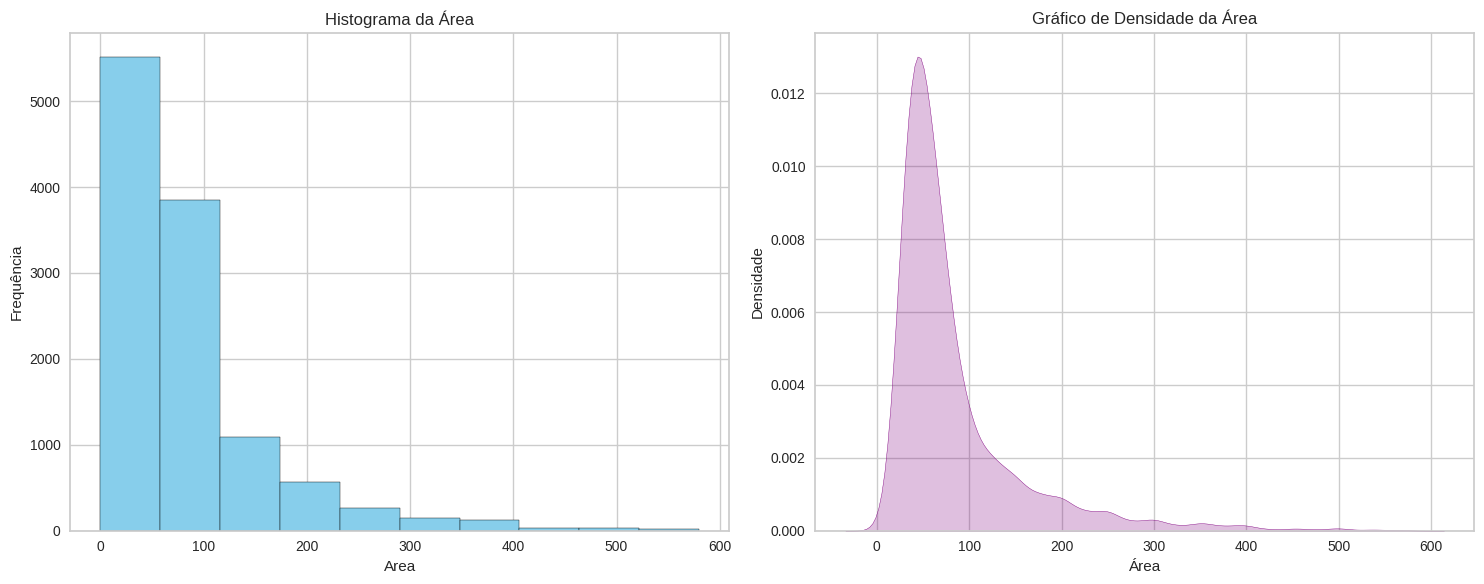

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma (usando Matplotlib)
axes[0].hist(df_imoveis.area, bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Histograma da Área')
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Frequência')

# Gráfico de Densidade (KDE Plot - usando Seaborn)
sns.kdeplot(data=df_imoveis, x='area', fill=True, color='purple', ax=axes[1])
axes[1].set_title('Gráfico de Densidade da Área')
axes[1].set_xlabel('Área')
axes[1].set_ylabel('Densidade')

plt.tight_layout()
plt.show()


count    11657.000000
mean        84.655658
std         74.020536
min          0.000000
25%         40.000000
50%         60.000000
75%         96.000000
max        580.000000
Name: area, dtype: float64

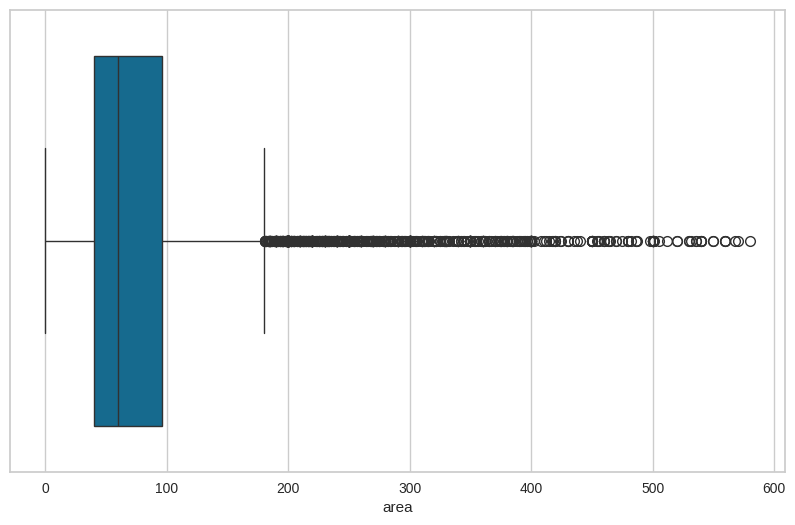

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_imoveis['area'])
df_imoveis.area.describe()

In [74]:
df_imoveis[df_imoveis.rent == 500]

,address,district,area,bedrooms,garage,type,rent,total
51,Rua Tanque Velho,Vila Nivi,45,1,0,Casa,500,551
1188,Viela Renaldo Laporta,Vila Aurora (zona Norte),30,1,0,Casa,500,521
4741,Rua Manoel Oliveira Gonçalves,Jardim Jaçanã,30,1,0,Casa,500,509
5901,Rua Manuel José Rodrigues,Sacoma,40,1,0,Casa,500,521
6428,Rua Eugênia S Vitale,Taboão,30,1,0,Studio e kitnet,500,594
7420,Rua Manuel José Rodrigues,Sacoma,20,1,0,Casa,500,521
10559,Rua Arraial de São Bartolomeu,Vila Carmosina,70,2,0,Casa,500,821


## Limpeza dos dados
### Apagar todos os imóveis cuja área é menor do que o valor mais barato de aluguel

In [75]:
print(df_imoveis.iloc[7420])
df_imoveis = df_imoveis[df_imoveis.area >= 20]
df_imoveis.describe()

address     Rua Manuel José Rodrigues
district                       Sacoma
area                               20
bedrooms                            1
garage                              0
type                             Casa
rent                              500
total                             521
Name: 7420, dtype: object


,area,bedrooms,garage,rent,total
count,11527.000000,11527.000000,11527.000000,11527.000000,11527.000000
mean,85.441572,1.976750,1.070964,3267.655071,4102.887308
std,74.062557,0.930417,1.133312,2654.684130,3358.231753
min,20.000000,0.000000,0.000000,500.000000,509.000000
25%,41.000000,1.000000,0.000000,1600.000000,2010.000000
50%,60.000000,2.000000,1.000000,2440.000000,3076.000000
75%,97.000000,3.000000,2.000000,3835.000000,4812.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


In [76]:
colunas_categoricas = df_imoveis.select_dtypes(include=['object','category']).columns
print(colunas_categoricas)
for col in colunas_categoricas:
    print(f'{col}{df_imoveis[col].unique().shape}')

Index(['address', 'district', 'type'], dtype='object')
address(5306,)
district(1195,)
type(4,)


In [77]:
#Limpa os espaços dos valores
for col in colunas_categoricas:
    df_imoveis.loc[:, col] = df_imoveis[col].str.strip()

In [78]:
# Exibe a quantidade de valores unicos das colunas categóricas
print(colunas_categoricas)
for col in colunas_categoricas:
    print(f'{col}{df_imoveis[col].unique().shape}')

Index(['address', 'district', 'type'], dtype='object')
address(5306,)
district(1181,)
type(4,)


In [79]:
#Verifica se tem lixo nos valores das colunas categoricas
tem_lixo = [col for col in colunas_categoricas if df_imoveis[col].str.contains('\\?').any()]
print(tem_lixo)

df_imoveis.isna().sum()

[]


address     0
district    0
area        0
bedrooms    0
garage      0
type        0
rent        0
total       0
dtype: int64

In [80]:
# Remoção da coluna rent, será utilizado somente a coluna Total como target para o modelo
df_imoveis = df_imoveis.drop(columns=['rent'], axis=1)

In [81]:
df_imoveis

,address,district,area,bedrooms,garage,type,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2939
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1954
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento,4587
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento,5187
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet,2244
...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,10200


## Criação de coluna de discretização do preço do aluguel

In [104]:
df_imoveis.total.describe()

count    11527.000000
mean      4102.887308
std       3358.231753
min        509.000000
25%       2010.000000
50%       3076.000000
75%       4812.000000
max      28700.000000
Name: total, dtype: float64

In [105]:
# Definindo os limites (bins) e os rótulos das categorias
bins = [509, 2010, 3076, 4812, 28700]
labels = ['Baixo', 'Medio', 'Alto', 'Muito Alto']

# Usa pd.cut() para categorizar os preços
df_imoveis['price_level'] = pd.cut(
    df_imoveis['total'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

print("\nDataFrame com a nova coluna categórica:")
print(df_imoveis.head())


DataFrame com a nova coluna categórica:
                 address           district  area  bedrooms  garage  \
0             Rua_Herval         Belenzinho    21         1       0   
3       Rua_Júlio_Sayago            Vila_Ré    56         2       2   
5     Rua_Domingos_Paiva               Brás    50         2       1   
6         Rua_Guararapes  Brooklin_Paulista    72         2       1   
7  Avenida_Cásper_Líbero             Centro    26         1       0   

                 type  total price_level  
0     Studio_e_kitnet   2939       Medio  
3  Casa_em_condomínio   1954       Baixo  
5         Apartamento   4587        Alto  
6         Apartamento   5187  Muito Alto  
7     Studio_e_kitnet   2244       Medio  


## Distribuição dos dados

In [82]:
#Exibe a Moda das colunas calegóricas
for col in colunas_categoricas: print(f'A Moda da coluna "{col}" é "{df_imoveis[col].mode()[0]}"')

A Moda da coluna "address" é "Rua da Consolação"
A Moda da coluna "district" é "Bela Vista"
A Moda da coluna "type" é "Apartamento"


In [83]:
# Exibe os 5 primeiros valores das colunas categoricas
for col in colunas_categoricas: print(f'{df_imoveis[col].value_counts()[:5]}\n')

address
Rua da Consolação                  49
Rua Bela Cintra                    47
Avenida Brigadeiro Luís Antônio    35
Avenida Ipiranga                   32
Avenida Nove de Julho              29
Name: count, dtype: int64

district
Bela Vista         342
Vila Mariana       227
Jardim Paulista    220
Centro             177
Consolação         156
Name: count, dtype: int64

type
Apartamento           7172
Casa                  2823
Studio e kitnet       1294
Casa em condomínio     238
Name: count, dtype: int64



## Divisão entre previsores (X) e classe (y)

In [84]:
# Previsores (features)
X_imoveis = df_imoveis.iloc[:, 0:6]
print(f'{X_imoveis=}')

# Classe (target)
y_imoveis = df_imoveis.iloc[:,6]
print(f'{y_imoveis=}')

X_imoveis=                               address                 district  area  \
0                           Rua Herval               Belenzinho    21   
3                     Rua Júlio Sayago                  Vila Ré    56   
5                   Rua Domingos Paiva                     Brás    50   
6                       Rua Guararapes        Brooklin Paulista    72   
7                Avenida Cásper Líbero                   Centro    26   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       bedrooms  garage                type  
0             1       0     Studio e kitnet  
3             2      

##  Codificação de variáveis categóricas

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [86]:
X_imoveis

,address,district,area,bedrooms,garage,type
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio
5,Rua Domingos Paiva,Brás,50,2,1,Apartamento
6,Rua Guararapes,Brooklin Paulista,72,2,1,Apartamento
7,Avenida Cásper Líbero,Centro,26,1,0,Studio e kitnet
...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento


In [88]:
# Identificar colunas categóricas e numéricas
col_categoricas = ['address', 'district', 'type', 'bedrooms', 'garage']
cols_numericas = ['area']

In [89]:
#Substitui os espaços dos valores por underline
for col in colunas_categoricas:
    df_imoveis.loc[:, col] = df_imoveis[col].str.replace(' ','_')

In [90]:
# Cria o transformer
preprocessador = ColumnTransformer(transformers=[('num', StandardScaler(), cols_numericas),
                                                 ('cat', OneHotEncoder(), col_categoricas)])

In [91]:
#Transforma os dados
matriz_csr = preprocessador.fit_transform(df_imoveis)
matriz_csr

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 69162 stored elements and shape (11527, 6506)>

In [92]:
# Define o nome das novas colunas criadas
colunas_novas = (
      [f"{col}_scaled" for col in cols_numericas] +
          list(preprocessador.named_transformers_['cat'].get_feature_names_out(col_categoricas))
          )

print(colunas_novas)

['area_scaled', 'address_25_de_Março', 'address_Aclimação,_São_Paulo_-_Sp,_04109-120,_Brasil', 'address_Alameda_Afonso_Bocchiglieri', 'address_Alameda_Afonso_Schmidt', 'address_Alameda_Amazonas', 'address_Alameda_América', 'address_Alameda_Arlíndo_Farias', 'address_Alameda_Barretos', 'address_Alameda_Barros', 'address_Alameda_Barão_de_Limeira', 'address_Alameda_Barão_de_Piracicaba', 'address_Alameda_Bertioga', 'address_Alameda_Brilhante', 'address_Alameda_Calicut', 'address_Alameda_Campestre', 'address_Alameda_Campinas', 'address_Alameda_Canto_dos_Passaros', 'address_Alameda_Casa_Branca', 'address_Alameda_Casa_Branca_-_Jardim_Paulista,_São_Paulo_-_Sp,_Brasil', 'address_Alameda_Cauaxi', 'address_Alameda_Cleveland', 'address_Alameda_Conde_de_Porto_Alegre', 'address_Alameda_Coral', 'address_Alameda_Cores_da_Mata', 'address_Alameda_Dinamarca', 'address_Alameda_Dino_Bueno', 'address_Alameda_Eduardo_Prado', 'address_Alameda_Equador', 'address_Alameda_Fernão_Cardim', 'address_Alameda_Franca',

In [93]:
# Convertendo Matriz Espassa (CSR)
matriz_densa = matriz_csr.toarray()

In [94]:
# Gerar DataFrame final
df_transformado = pd.DataFrame(matriz_densa, columns=colunas_novas)
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11527 entries, 0 to 11526
Columns: 6506 entries, area_scaled to garage_6
dtypes: float64(6506)
memory usage: 572.2 MB


In [95]:
# Escalonamento do dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_df_transformado = scaler.fit_transform(df_transformado)
X_df_transformado[0]

array([-0.87013424, -0.00931452, -0.00931452, ..., -0.16924943,
       -0.09905378, -0.08619032])

## Balanceamento dos dados/Divisão da Base em treinamento, teste

In [96]:
y_imoveis.describe()

count    11527.000000
mean      4102.887308
std       3358.231753
min        509.000000
25%       2010.000000
50%       3076.000000
75%       4812.000000
max      28700.000000
Name: total, dtype: float64

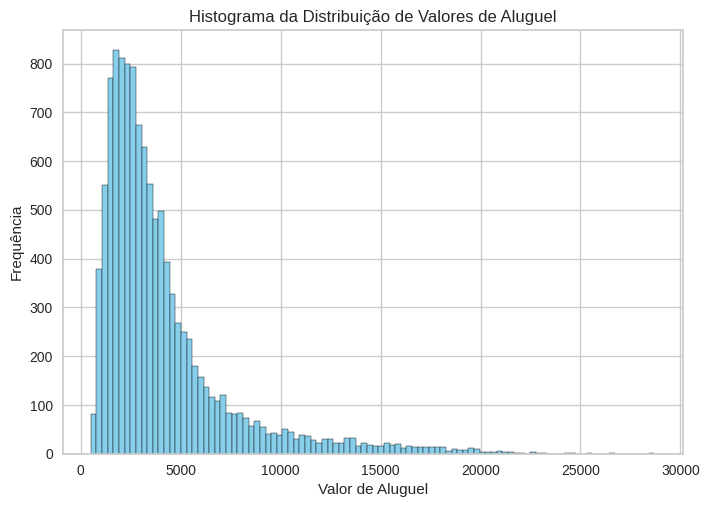

In [97]:
plt.hist(y_imoveis, bins=100, edgecolor='black', color='skyblue')

# Adicione rótulos e título
plt.title('Histograma da Distribuição de Valores de Aluguel')
plt.xlabel('Valor de Aluguel')
plt.ylabel('Frequência')

# Exiba o gráfico
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_df_transformado, y_imoveis, 
                                                                              test_size = 0.25, random_state =7)

In [99]:
print('Shape Treinamento ( X, y)')
print(X_treinamento.shape, y_treinamento.shape)
print('Shape Teste (X, y)')
print(X_teste.shape, y_teste.shape)

Shape Treinamento ( X, y)
(8645, 6506) (8645,)
Shape Teste (X, y)
(2882, 6506) (2882,)


In [100]:
X_treinamento

array([[-0.61358323, -0.00931452, -0.00931452, ..., -0.16924943,
        -0.09905378, -0.08619032],
       [-0.58657786, -0.00931452, -0.00931452, ..., -0.16924943,
        -0.09905378, -0.08619032],
       [-0.54606981, -0.00931452, -0.00931452, ..., -0.16924943,
        -0.09905378, -0.08619032],
       ...,
       [ 0.53414499, -0.00931452, -0.00931452, ..., -0.16924943,
        -0.09905378, -0.08619032],
       [-0.78911814, -0.00931452, -0.00931452, ..., -0.16924943,
        -0.09905378, -0.08619032],
       [ 0.29109666, -0.00931452, -0.00931452, ..., -0.16924943,
        -0.09905378, -0.08619032]])

## Treinamento de Modelos

In [101]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report, accuracy_score

def model_analyser(modelo, X_treinamento, y_treinamento, X_teste, y_teste):
    modelo.fit(X_treinamento, y_treinamento)
    previsoes = modelo.predict(X_teste)
    print('Previsões:')
    print(f'{previsoes = }\n')
    print(f'{y_teste = }\n\n')

    print('Relatório de Classificação:')
    print(classification_report(y_teste, previsoes))

    accuracy = accuracy_score(y_teste, previsoes)
    print(f'Acurácia: {accuracy}')

    print('Matriz de Confusão:')
    cm = ConfusionMatrix(modelo)
    cm.fit(X_treinamento, y_treinamento)
    cm.score(X_teste, y_teste)

    return accuracy

### Naïve Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
modelo_naive_bayes = GaussianNB()
nb_acc = model_analyser(modelo_naive_bayes, X_treinamento, y_treinamento, X_teste, y_teste)

KeyboardInterrupt: 

In [112]:
#Salvando previsores e classe
# salvar X_df e y_df
import pickle
with open('./dados/imoveis.pkl', mode = 'wb') as f:
  pickle.dump([X_imoveis, y_imoveis], f)

In [ ]:
#Carrega dos dados salvos
import pickle
with open('./dados/imoveis.pkl', mode='rb') as f:
    previsores, classe = pickle.load(f)